# Linerar programming optimization

Follwoing [realpython](https://realpython.com/linear-programming-python/)

Linear programming is a set of techniques used in mathematical programming, sometimes called mathematical optimization, to solve systems of linear equations and inequalities while maximizing or minimizing some linear function.

**Mixed-integer linear programming** is an extension of linear programming. It handles problems in which at least one variable takes a discrete integer rather than a continuous value. Although mixed-integer problems look similar to continuous variable problems at first sight, they offer significant advantages in terms of flexibility and precision.

Mixed-integer linear programming allows you to overcome many of the limitations of linear programming. You can approximate non-linear functions with piecewise linear functions, use semi-continuous variables, model logical constraints, and more. 

## Small linear programming problem

Consider the following linear programming problem:

maximise
\begin{equation}
z = x + 2y
\end{equation}
subject to
\begin{eqnarray}
2x + y &\leq& 20 \\
-4x + 5y &\leq& 10 \\
-x +2y &\geq& -2 \\
x &\geq& 0 \\
y &\geq& 0
\end{eqnarray}

The independent variables you need to find—in this case x and y—are called the **decision variables**. The function of the decision variables to be maximized or minimized—in this case z—is called the **objective function**, the **cost function**, or just the **goal**. The inequalities you need to satisfy are called the **inequality constraints**. You can also have equations among the constraints called **equality constraints**.

In [1]:
import numpy as np

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [65]:
x = y = np.linspace(0,10, 1000)
xx, yy = np.meshgrid(x,y)

In [66]:
constraint_1 = 2 * xx + yy <= 20
constraint_2 = -4 * xx + 5 * yy <= 10
constraint_3 = -1 * xx + 2 * yy >= -2

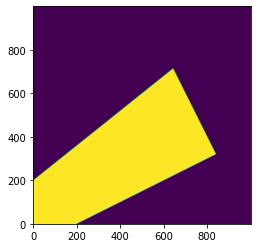

In [67]:
fig, ax = plt.subplots()

feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3, origin='lower')

Each point of the yellow area satisfies all constraints and is a potential solution to the problem. This area is called the **feasible region**, and its points are **feasible solutions**. In this case, there’s an infinite number of feasible solutions.

You want to maximize z. The feasible solution that corresponds to maximal z is the optimal solution. If you were trying to minimize the objective function instead, then the optimal solution would correspond to its feasible minimum.

Note that z is linear. You can imagine it as a plane in three-dimensional space. This is why the optimal solution must be on a **vertex**, or corner, of the feasible region.

Sometimes a whole edge of the feasible region, or even the entire region, can correspond to the same value of z. In that case, you have many optimal solutions.

Add an equality constrain
\begin{equation}
-x + 5y = 15
\end{equation}

In [70]:
constraint_4 = (-1 * xx + 15 * yy <= 15+0.1) & (-1 * xx + 15 * yy >= 15-0.1)

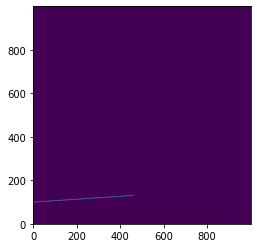

In [71]:
fig, ax = plt.subplots()

feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3*constraint_4, origin='lower')

The feasible region is now a line, if we demand that all values of x must be integer we will get a **mixed integer linear programming problem**. The set of feasible solutions will change to points aranged on a line.

A linear integer programming problem is **feasible** when it has bounded feasible regions and finite solutions.

A linear programming problem is infeasible if it does not have a solution. This usually happens when no solution can satisfy all constraints at once.

A linear programming problem is unbounded if its feasible region isn’t bounded and the solution is not finite. This means that at least one of your variables is not constrained and can reach to positive or negative infinity, making the objective infinite as well.

## Ressource allocation problem

Say that a factory produces four different products, and that the daily produced amount of the first product is $x_1$, the amount produced of the second product is $x_2$, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:

1. The profit per unit of product is 20\\$, 12\\$, 40\\$, and 25\\$ for the first, second, third, and fourth product, respectively.
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.
3. For each unit of the first product, three units of the raw material $A$ are consumed. Each unit of the second product requires two units of the raw material $A$ and one unit of the raw material $B$. Each unit of the third product needs one unit of $A$ and two units of $B$. Finally, each unit of the fourth product requires three units of $B$.
4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material $A$ and ninety units of $B$ per day.

The mathematical model can be defined as such:

\begin{equation}
\mathrm{max} \left(20x_1+12x_2+40x_3+25x_4 \right) \, \mathrm{(profit)}
\end{equation}
s.t.:
\begin{eqnarray}
&x_1& + &x_2& + &x_3& + &x_4& &\leq& 50 \, &(\mathrm{manpower})& \\
3&x_1&+2&x_2&+&x_3& && &\leq& 100 \, &(\mathrm{material} \ A)& \\
&& &x_2&+2&x_3&+3&x_4& &\leq& 90 \, &(\mathrm{material} \ B)& \\
\end{eqnarray}
\begin{eqnarray}
x_1, x_2, x_3, x_4 \geq 0
\end{eqnarray}
